In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *
from dataset import *
from data_module import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset_strat.csv')

In [5]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[1494, 434, 1694, 633], [396, 1137, 591, 1332...",5,0
1,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[406, 374, 611, 568], [1499, 384, 1694, 578]]",2,0
2,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[726, 859, 925, 1054], [1699, 2301, 1893, 249...",7,0
3,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[217, 2465, 416, 2665], [227, 265, 431, 459],...",5,0
4,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[1414, 429, 1614, 623]]",1,0
...,...,...,...,...,...,...,...
179,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[376, 2375, 571, 2570], [3410, 414, 3610, 613]]",2,4
180,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[461, 354, 656, 554], [2492, 389, 2692, 588],...",9,4
181,/media/scratch/astamoulakatos/NMIS/images/2021...,4032,3024,Bolt,"[[2198, 574, 2397, 774], [1195, 520, 1394, 714...",11,4
182,/media/scratch/astamoulakatos/NMIS/images/2021...,1512,2016,Bolt,"[[1290, 1251, 1393, 1357], [578, 143, 677, 243...",3,4


In [6]:
df["bboxes"] = df["bboxes"].apply(eval)

In [7]:
test_dataset = BoltDataset(df, get_valid_transforms(), 'train')

In [8]:
test_dataset[0]

(tensor([[[1.5639, 1.5810, 1.5810,  ..., 1.5639, 1.6153, 1.5297],
          [1.5810, 1.6324, 1.6153,  ..., 1.6153, 1.5468, 1.5810],
          [1.5639, 1.5810, 1.6324,  ..., 1.5982, 1.5982, 1.5297],
          ...,
          [1.6838, 1.6667, 1.6495,  ..., 1.8722, 1.8893, 1.8208],
          [1.5982, 1.6324, 1.5810,  ..., 1.8037, 1.8037, 1.8037],
          [1.5982, 1.6324, 1.6495,  ..., 1.8037, 1.8037, 1.7865]],
 
         [[1.7983, 1.7983, 1.8158,  ..., 1.8333, 1.8333, 1.7983],
          [1.7808, 1.7633, 1.7983,  ..., 1.8333, 1.8333, 1.8508],
          [1.7808, 1.7633, 1.7983,  ..., 1.8158, 1.8683, 1.7808],
          ...,
          [1.9209, 1.8859, 1.9034,  ..., 2.0259, 2.0784, 2.0259],
          [1.8683, 1.8859, 1.9034,  ..., 2.0609, 2.0609, 2.0434],
          [1.8683, 1.8859, 1.9209,  ..., 2.0434, 2.0784, 2.0259]],
 
         [[2.0648, 2.1346, 2.0997,  ..., 2.1346, 2.1171, 2.1346],
          [2.0823, 2.0823, 2.0997,  ..., 2.1171, 2.1694, 2.1694],
          [2.0823, 2.0997, 2.0823,  ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 512])


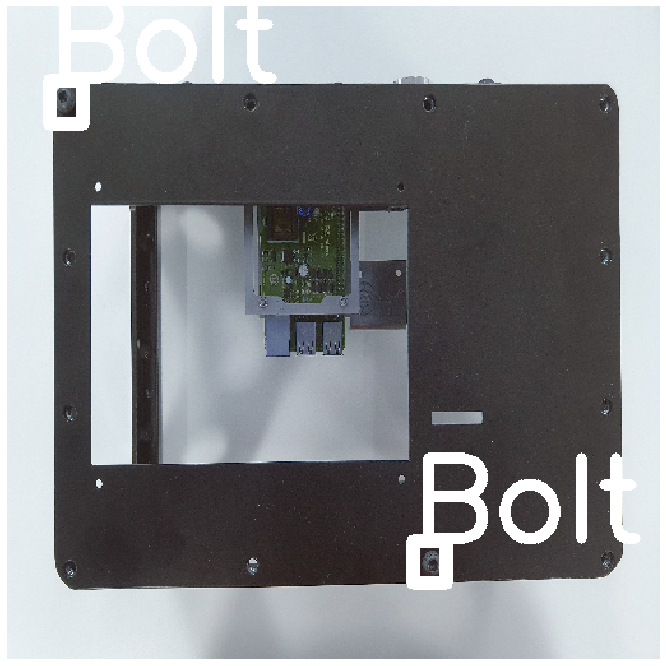

In [9]:
test_dataset.show_data(5)

In [10]:
bolt_module = BoltDataModule(df,
                             get_train_transforms(target_img_size=512),
                             get_valid_transforms(target_img_size=512),
                             num_workers=16,
                             bs=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 512])


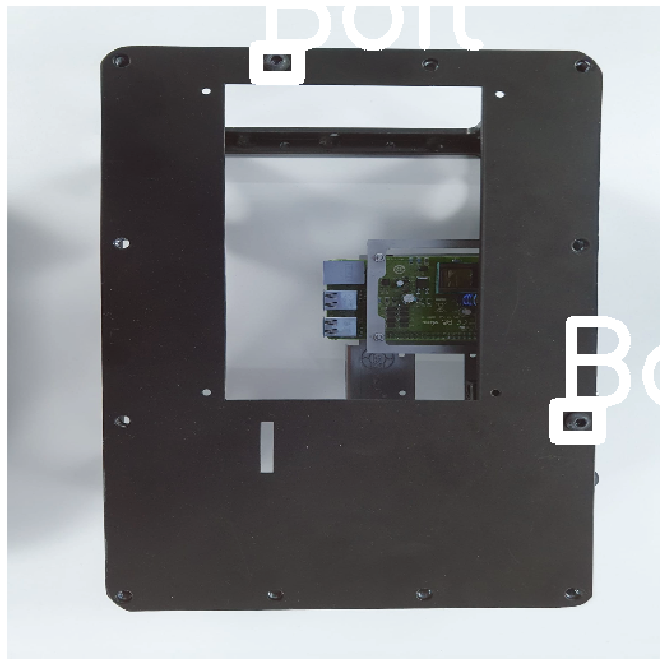

In [11]:
bolt_module.train_dataset().show_data(13)

In [12]:
loader = bolt_module.train_dataloader()

In [13]:
len(loader)

55

In [14]:
images, annotations, targets, bolts = next(iter(loader))

In [15]:
targets

[{'bboxes': tensor([[262.5664, 439.2205, 301.8422, 468.2337],
          [ 54.6875, 287.0812,  91.4417, 315.8670],
          [209.4347,  33.5790, 246.9955,  61.1949]]),
  'labels': tensor([1, 1, 1]),
  'bolts': 3,
  'img_size': [512, 512],
  'img_scale': tensor([1.])},
 {'bboxes': tensor([[59.9365, 29.4603, 92.9524, 54.2222]]),
  'labels': tensor([1]),
  'bolts': 1,
  'img_size': [512, 512],
  'img_scale': tensor([1.])}]